In [4]:
# import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import random
import numpy as np

# Set random seed for reproducible output
np.random.seed(42)
random.seed(42)

def generate_consolidated_social_media_dataset(days=30):
    """Generate consolidated social media usage dataset with consistent sessions"""
    
    # Step 1: Generate temporal usage patterns first to establish sessions
    print("Generating temporal usage patterns...")
    temporal_data = []
    
    # User-specific patterns
    base_sessions_per_day = np.random.gamma(2, 3)  # 2-20 sessions/day
    weekend_multiplier = np.random.uniform(1.2, 2.0)  # More usage on weekends
    
    session_id = 0
    for day in range(days):
        is_weekend = day % 7 in [5, 6]
        sessions_today = int(base_sessions_per_day * (weekend_multiplier if is_weekend else 1))
        
        # Generate sessions for this day
        session_times = np.random.uniform(0, 24, sessions_today)
        
        for session_time in session_times:
            # Session duration (log-normal distribution, 1-60 minutes)
            duration = np.random.lognormal(2.5, 1.2)  
            duration = np.clip(duration, 1, 120)  # 1-120 minutes
            
            # Time between sessions
            time_since_last = np.random.exponential(2)  # Hours
            
            # Peak usage hours (evening bias)
            if 18 <= session_time <= 23:
                duration *= np.random.uniform(1.5, 2.5)
            
            # Convert decimal hour to readable time format
            hour = int(session_time)
            minute = int((session_time - hour) * 60)
            session_time_readable = f"{hour:02d}:{minute:02d}"
            
            temporal_data.append({
                'session_id': session_id,
                'day': day,
                'session_start_hour_decimal': session_time,
                'session_start_time': session_time_readable,
                'session_duration_minutes': duration,
                #'time_since_last_session_hours': time_since_last,
                #'is_weekend': is_weekend
            })
            session_id += 1
    
    temporal_df = pd.DataFrame(temporal_data)
    total_sessions = len(temporal_df)
    print(f"Generated {total_sessions} sessions over {days} days")
    
    # Step 2: Generate engagement depth indicators for each session
    print("Generating engagement depth indicators...")
    engagement_data = []
    
    for session_id in range(total_sessions):
        # User type influences behavior
        user_type = np.random.choice(['casual', 'moderate', 'heavy'], p=[0.4, 0.4, 0.2])
        
        # Scroll velocity (posts per minute)
        if user_type == 'casual':
            scroll_velocity = np.random.gamma(2, 2)  # Slower scrolling
        elif user_type == 'moderate':
            scroll_velocity = np.random.gamma(3, 3)
        else:  # heavy user
            scroll_velocity = np.random.gamma(5, 4)  # Faster scrolling
            
        # Scroll depth (relative to feed length)
        scroll_depth = np.random.beta(2, 3)  # Most users don't scroll to bottom
        
        # Content interaction rate (interactions per 100 posts viewed)
        base_interaction_rate = np.random.beta(2, 8) * 20  # 0-20%
        
        # Time spent per post (seconds)
        time_per_post = np.random.lognormal(1.5, 0.8)
        time_per_post = np.clip(time_per_post, 1, 60)
        
        # Return-to-feed frequency (times per session)
        return_frequency = np.random.poisson(3)
        
        engagement_data.append({
            'session_id': session_id,
            'user_type': user_type,
            'scroll_velocity_posts_per_min': scroll_velocity,
            #'scroll_depth_percentage': scroll_depth * 100,
            'interaction_rate_percentage': base_interaction_rate,
            'time_per_post_seconds': time_per_post,
            'return_to_feed_frequency': return_frequency
        })
    
    engagement_df = pd.DataFrame(engagement_data)
    
    # Step 3: Generate RICH content consumption patterns for each session
    print("Generating rich content consumption patterns for LLM summaries...") 
    content_data = []
    
    content_types = ['photo', 'video', 'story', 'reel', 'text']
    content_categories = ['lifestyle', 'news', 'entertainment', 'sports', 'politics', 'wellness', 
                         'food', 'travel', 'fashion', 'tech', 'memes', 'pets']
    
    # Quirky content behaviors for funny summaries
    weird_rabbit_holes = ['conspiracy theories about birds', 'DIY furniture fails', 'medieval recipes',
                         'people arguing about pineapple on pizza', 'cats wearing tiny hats',
                         'TikTok dances from 2019', 'arguing about which cereal is best',
                         'reviews of gas station bathrooms', 'people organizing their sock drawers',
                         'weird food combinations', 'failed craft projects', 'relationship advice from teenagers']
    
    cringe_moments = ['accidentally liked ex\'s photo from 2018', 'watched own old stories', 
                     'replied to wrong person', 'posted and immediately deleted',
                     'argued with a bot', 'fell for clickbait about celebrities',
                     'spent 20 mins on someone\'s vacation photos', 'stalked college acquaintance']
    
    binge_behaviors = ['watched every cat video in existence', 'read 47 relationship advice posts',
                      'looked at food for 30 minutes while hungry', 'watched house tours of strangers',
                      'binged workout videos without working out', 'researched products to never buy',
                      'watched makeup tutorials with no intention of doing makeup']
    
    procrastination_content = ['productivity tips while procrastinating', 'study motivation videos',
                              'organization hacks for messy room', 'workout videos from bed',
                              'healthy recipes while eating junk food', 'financial advice while shopping']
    
    social_behaviors = ['lurked on high school friend\'s profile', 'checked if crush viewed story',
                       'analyzed response time patterns', 'compared life to influencers',
                       'screenshot funny posts for group chat', 'planned perfect response for 10 minutes']
    
    for session_id in range(total_sessions):
        # User preferences
        preferred_type = np.random.choice(content_types)
        preferred_categories = np.random.choice(content_categories, size=np.random.randint(2, 4), replace=False)
        
        # Content type distribution
        type_probs = [0.15] * len(content_types)
        type_probs[content_types.index(preferred_type)] = 0.4
        type_consumed = np.random.choice(content_types, p=np.array(type_probs)/sum(type_probs))
        
        # Time on negative/controversial content
        negative_content_time = np.random.exponential(5)  # Minutes
        
        # Recommendation algorithm engagement
        algo_clicks = np.random.poisson(8)
        
        # Search vs feed browsing ratio
        search_ratio = np.random.beta(1, 4)  # Most time in feed, some searching
        
        # NEW RICH CONTENT PATTERNS FOR FUNNY SUMMARIES
        
        # Rabbit hole adventures
        went_down_rabbit_hole = np.random.random() < 0.3
        rabbit_hole_topic = np.random.choice(weird_rabbit_holes) if went_down_rabbit_hole else None
        rabbit_hole_duration = np.random.exponential(15) if went_down_rabbit_hole else 0
        
        # Cringe moments
        had_cringe_moment = np.random.random() < 0.2
        cringe_description = np.random.choice(cringe_moments) if had_cringe_moment else None
        
        # Binge watching behavior
        binge_watched = np.random.random() < 0.4
        binge_topic = np.random.choice(binge_behaviors) if binge_watched else None
        binge_count = np.random.poisson(12) if binge_watched else 0
        
        # Procrastination patterns
        procrastinating = np.random.random() < 0.35
        procrastination_topic = np.random.choice(procrastination_content) if procrastinating else None
        procrastination_irony_level = np.random.uniform(0, 10) if procrastinating else 0
        
        # Social stalking behavior
        social_stalking = np.random.random() < 0.25
        stalking_behavior = np.random.choice(social_behaviors) if social_stalking else None
        
        # Emotional state influence on content
        emotional_state = np.random.choice(['happy', 'sad', 'bored', 'anxious', 'excited', 'stressed'])
        mood_influenced_content = np.random.random() < 0.6
        
        # Shopping temptation
        saw_ads_count = np.random.poisson(5)
        clicked_shopping_ads = np.random.poisson(2)
        added_to_cart_but_didnt_buy = np.random.random() < 0.4
        
        # Content creation attempts
        tried_to_post = np.random.random() < 0.3
        deleted_before_posting = np.random.random() < 0.7 if tried_to_post else False
        took_selfies_count = np.random.poisson(3) if tried_to_post else 0
        
        # FOMO and comparison behavior
        compared_life_to_others = np.random.random() < 0.4
        felt_fomo = np.random.random() < 0.3
        lifestyle_envy_minutes = np.random.exponential(8) if compared_life_to_others else 0
        
        # Random specific behaviors for humor
        watched_food_while_hungry = np.random.random() < 0.2
        looked_at_vacation_photos_in_winter = np.random.random() < 0.15
        researched_random_topic = np.random.random() < 0.25
        random_research_topic = np.random.choice(['how to become a beekeeper', 'cost of living in Iceland',
                                                'can cats be vegetarian', 'how to build a treehouse',
                                                'are dolphins really that smart', 'why do we say OK'])
        
        content_data.append({
            'session_id': session_id,
            'primary_content_type': type_consumed,
            'preferred_categories': ','.join(preferred_categories),
            'negative_content_minutes': negative_content_time,
            'algorithm_interactions': algo_clicks,
            'search_vs_feed_ratio': search_ratio,
            
            # Rich behavioral data for funny summaries
            'went_down_rabbit_hole': went_down_rabbit_hole,
            'rabbit_hole_topic': rabbit_hole_topic,
            'rabbit_hole_duration_minutes': rabbit_hole_duration,
            'had_cringe_moment': had_cringe_moment,
            'cringe_description': cringe_description,
            'binge_watched_content': binge_watched,
            'binge_topic': binge_topic,
            'binge_count': binge_count,
            'was_procrastinating': procrastinating,
            'procrastination_topic': procrastination_topic,
            'procrastination_irony_level': procrastination_irony_level,
            'social_stalking': social_stalking,
            'stalking_behavior': stalking_behavior,
            'emotional_state': emotional_state,
            'mood_influenced_content': mood_influenced_content,
            'ads_seen_count': saw_ads_count,
            'shopping_ads_clicked': clicked_shopping_ads,
            'added_to_cart_no_buy': added_to_cart_but_didnt_buy,
            'attempted_to_post': tried_to_post,
            'deleted_before_posting': deleted_before_posting,
            'selfies_taken_count': took_selfies_count,
            'compared_life_to_others': compared_life_to_others,
            'felt_fomo': felt_fomo,
            'lifestyle_envy_minutes': lifestyle_envy_minutes,
            'watched_food_while_hungry': watched_food_while_hungry,
            'vacation_photos_in_winter': looked_at_vacation_photos_in_winter,
            'random_research': researched_random_topic,
            'random_research_topic': random_research_topic if researched_random_topic else None
        })
    
    content_df = pd.DataFrame(content_data)
    
    # Step 4: Generate behavioral triggers for each session
    print("Generating behavioral triggers...")
    trigger_data = []
    
    trigger_types = ['notification', 'boredom', 'habit', 'social', 'news_check']
    
    for session_id in range(total_sessions):
        # Notification response pattern
        notification_delay = np.random.lognormal(1, 1.5)  # Minutes to respond
        notification_delay = np.clip(notification_delay, 0.1, 120)
        
        # Trigger for opening app
        opening_trigger = np.random.choice(trigger_types, 
                                         p=[0.3, 0.25, 0.2, 0.15, 0.1])
        
        # Background app usage (0-1 scale)
        background_usage = np.random.beta(2, 5)
        
        # How session ended
        exit_type = np.random.choice(['intentional', 'distracted', 'forced'], 
                                   p=[0.4, 0.4, 0.2])
        
        trigger_data.append({
            'session_id': session_id,
            'notification_response_minutes': notification_delay,
            'opening_trigger': opening_trigger,
            'background_usage_score': background_usage,
            'exit_behavior': exit_type
        })
    
    trigger_df = pd.DataFrame(trigger_data)
    
    # Step 5: Generate wellbeing indicators (daily level)
    print("Generating wellbeing indicators...")
    wellbeing_data = []
    
    # User baseline characteristics
    baseline_compulsiveness = np.random.beta(2, 5)  # Most users low, some high
    baseline_sleep_quality = np.random.normal(7, 1.5)  # Hours of sleep
    
    for day in range(days):
        # Usage exceeding planned time
        planned_time = np.random.uniform(30, 120)  # Minutes planned
        actual_time = planned_time * np.random.lognormal(0, 0.5)  # Usually more
        time_overage = max(0, actual_time - planned_time)
        
        # Late night usage
        late_night_minutes = np.random.exponential(15) if np.random.random() < 0.3 else 0
        
        # Compulsive checking
        daily_compulsive_checks = np.random.poisson(baseline_compulsiveness * 20)
        
        # Sleep impact
        sleep_hours = baseline_sleep_quality - (late_night_minutes / 60) * 0.5
        sleep_hours = np.clip(sleep_hours, 4, 10)
        
        wellbeing_data.append({
            'day': day,
            'planned_usage_minutes': planned_time,
            'actual_usage_minutes': actual_time,
            'usage_overage_minutes': time_overage,
            'late_night_usage_minutes': late_night_minutes,
            'compulsive_checks_count': daily_compulsive_checks,
            'sleep_hours': sleep_hours,
            'baseline_compulsiveness': baseline_compulsiveness
        })
    
    wellbeing_df = pd.DataFrame(wellbeing_data)
    
    # Step 6: Merge all DataFrames into one consolidated DataFrame
    print("Consolidating data...")
    
    # Start with temporal data as the base
    consolidated_df = temporal_df
    
    # Merge engagement data
    consolidated_df = consolidated_df.merge(engagement_df, on='session_id', how='left')
    
    # Merge content data
    consolidated_df = consolidated_df.merge(content_df, on='session_id', how='left')
    
    # Merge behavioral trigger data
    consolidated_df = consolidated_df.merge(trigger_df, on='session_id', how='left')
    
    # Merge wellbeing data (daily level, so merge on 'day')
    consolidated_df = consolidated_df.merge(wellbeing_df, on='day', how='left')
    
    print(f"Consolidated dataset created with {len(consolidated_df)} sessions and {len(consolidated_df.columns)} columns")
    
    return consolidated_df

# Generate the consolidated dataset
consolidated_data = generate_consolidated_social_media_dataset(days=30)

# Save to CSV
consolidated_data.to_csv('synthetic_social_media_data_consolidated.csv', index=False)
print(f"Saved consolidated data with {len(consolidated_data)} sessions")

# Display basic info about the dataset
print(f"\nDataset shape: {consolidated_data.shape}")
print(f"Sessions per day range: {consolidated_data.groupby('day').size().min()} - {consolidated_data.groupby('day').size().max()}")
print(f"Average sessions per day: {consolidated_data.groupby('day').size().mean():.2f}")
print(f"\nColumn names:")
print(consolidated_data.columns.tolist())

Generating temporal usage patterns...
Generated 250 sessions over 30 days
Generating engagement depth indicators...
Generating rich content consumption patterns for LLM summaries...
Generating behavioral triggers...
Generating wellbeing indicators...
Consolidating data...
Consolidated dataset created with 250 sessions and 54 columns
Saved consolidated data with 250 sessions

Dataset shape: (250, 54)
Sessions per day range: 7 - 12
Average sessions per day: 8.33

Column names:
['session_id', 'day', 'session_start_hour_decimal', 'session_start_time', 'session_duration_minutes', 'user_type', 'scroll_velocity_posts_per_min', 'interaction_rate_percentage', 'time_per_post_seconds', 'return_to_feed_frequency', 'primary_content_type', 'preferred_categories', 'negative_content_minutes', 'algorithm_interactions', 'search_vs_feed_ratio', 'went_down_rabbit_hole', 'rabbit_hole_topic', 'rabbit_hole_duration_minutes', 'had_cringe_moment', 'cringe_description', 'binge_watched_content', 'binge_topic', '

In [5]:
# Calculate daily Mood Score based on content categories consumed
print("Calculating daily Mood Scores...")

# Define mood scores for each content category (from normal distributions)
np.random.seed(42)  # Reset seed for consistent mood scoring

# Assign mood scores to content categories
# Positive categories get higher scores, negative/stressful get lower scores
category_mood_scores = {
    'lifestyle': np.random.normal(7.5, 1.5),    # Generally positive
    'news': np.random.normal(4.0, 2.0),         # Often negative/stressful
    'entertainment': np.random.normal(8.0, 1.0), # Usually uplifting
    'sports': np.random.normal(7.0, 1.5),       # Exciting but can be disappointing
    'politics': np.random.normal(3.5, 2.0),     # Often divisive/stressful
    'wellness': np.random.normal(8.5, 1.0),     # Positive/inspiring
    'food': np.random.normal(7.8, 1.2),         # Generally pleasant
    'travel': np.random.normal(8.2, 1.0),       # Inspiring/aspirational
    'fashion': np.random.normal(7.2, 1.5),      # Can be inspiring or envious
    'tech': np.random.normal(6.5, 1.5),         # Mixed feelings
    'memes': np.random.normal(8.8, 0.8),        # Usually funny/positive
    'pets': np.random.normal(9.2, 0.6)          # Almost always positive
}

print("Content Category Mood Scores:")
for category, score in category_mood_scores.items():
    print(f"  {category}: {score:.2f}")

# Calculate daily mood scores
daily_mood_scores = []

for day in range(30):
    # Get all sessions for this day
    day_sessions = consolidated_data[consolidated_data['day'] == day]
    
    daily_mood_total = 0
    category_exposure_count = {}
    
    # Process each session's content categories
    for _, session in day_sessions.iterrows():
        categories = session['preferred_categories'].split(',')
        
        for category in categories:
            category = category.strip()  # Remove any whitespace
            if category in category_mood_scores:
                # Add mood score for this category
                daily_mood_total += category_mood_scores[category]
                
                # Track exposure count for averaging
                if category in category_exposure_count:
                    category_exposure_count[category] += 1
                else:
                    category_exposure_count[category] = 1
    
    # Calculate weighted average mood score for the day
    # (total mood points divided by number of category exposures)
    total_exposures = sum(category_exposure_count.values())
    daily_mood_score = daily_mood_total / total_exposures if total_exposures > 0 else 5.0  # neutral if no data
    
    daily_mood_scores.append(daily_mood_score)
    
    print(f"Day {day:2d}: {len(day_sessions)} sessions, {total_exposures:2d} category exposures, Mood Score: {daily_mood_score:.2f}")

# Convert to numpy array for easy manipulation
daily_mood_scores = np.array(daily_mood_scores)

print(f"\n30-Day Mood Score Vector:")
print(f"Shape: {daily_mood_scores.shape}")
print(f"Values: {daily_mood_scores}")
print(f"\nMood Score Statistics:")
print(f"Mean: {daily_mood_scores.mean():.2f}")
print(f"Std:  {daily_mood_scores.std():.2f}")
print(f"Min:  {daily_mood_scores.min():.2f}")
print(f"Max:  {daily_mood_scores.max():.2f}")

# Add to the consolidated dataset as well
daily_mood_df = pd.DataFrame({
    'day': range(30),
    'daily_mood_score': daily_mood_scores
})

consolidated_data_with_mood = consolidated_data.merge(daily_mood_df, on='day', how='left')
print(f"\nAdded daily_mood_score column to dataset. New shape: {consolidated_data_with_mood.shape}")

# Save updated dataset
consolidated_data_with_mood.to_csv('synthetic_social_media_data_with_mood.csv', index=False)
print("Saved updated dataset with mood scores!")

Calculating daily Mood Scores...
Content Category Mood Scores:
  lifestyle: 8.25
  news: 3.72
  entertainment: 8.65
  sports: 9.28
  politics: 3.03
  wellness: 8.27
  food: 9.70
  travel: 8.97
  fashion: 6.50
  tech: 7.31
  memes: 8.43
  pets: 8.92
Day  0: 7 sessions, 19 category exposures, Mood Score: 7.04
Day  1: 7 sessions, 17 category exposures, Mood Score: 7.59
Day  2: 7 sessions, 18 category exposures, Mood Score: 8.35
Day  3: 7 sessions, 18 category exposures, Mood Score: 7.91
Day  4: 7 sessions, 18 category exposures, Mood Score: 8.07
Day  5: 12 sessions, 30 category exposures, Mood Score: 7.68
Day  6: 12 sessions, 31 category exposures, Mood Score: 8.07
Day  7: 7 sessions, 17 category exposures, Mood Score: 6.99
Day  8: 7 sessions, 16 category exposures, Mood Score: 7.09
Day  9: 7 sessions, 17 category exposures, Mood Score: 8.14
Day 10: 7 sessions, 17 category exposures, Mood Score: 7.29
Day 11: 7 sessions, 16 category exposures, Mood Score: 7.85
Day 12: 12 sessions, 30 categ

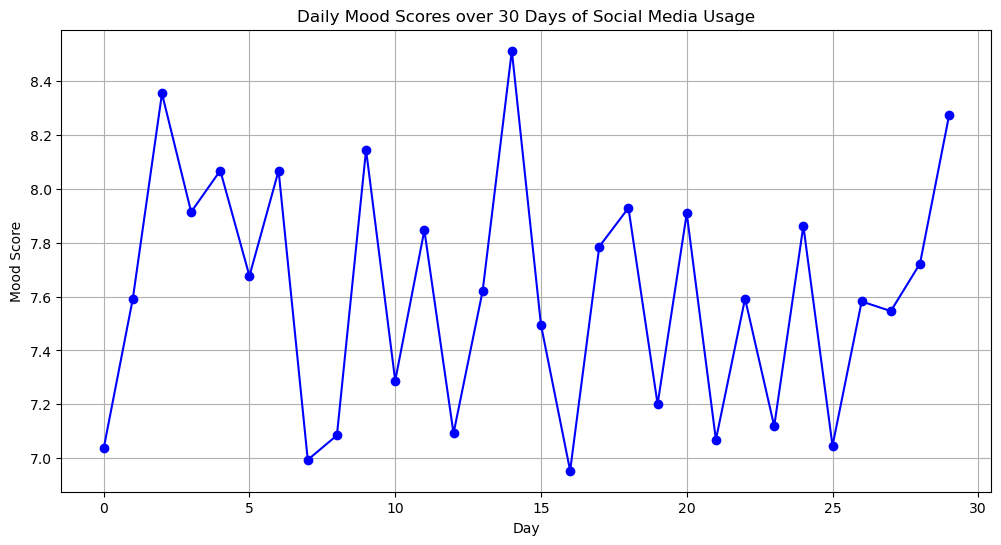

In [6]:
# Visualization of Mood Scores over 30 days
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(range(30), daily_mood_scores, marker='o', linestyle='-', color='b')
plt.title('Daily Mood Scores over 30 Days of Social Media Usage')
plt.xlabel('Day')
plt.ylabel('Mood Score')
plt.grid(True)
plt.show()
